<a href="https://colab.research.google.com/github/ShreyasJoshi22/Color-Detection-Kmeans-Clustering/blob/main/ColourDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

##**GRIP - July, 2021**

##**Shreyas Joshi**

## Computer Vision and Internet of Things 

---



### Task 1: Colour Detection

Folder for sample images

In [2]:
!mkdir Sample_images 

Importing libraries

In [3]:
#Importing required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

The sample image

The type of this input is <class 'numpy.ndarray'>
Shape: (370, 600, 3)


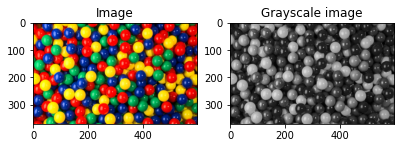

In [68]:
image = cv2.imread('Balls.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (600, 370))
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('Grayscale image')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Function for:

1) Converting RGB values to HEX values

In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

2) Reading an image and converting from BGR format to RGB format

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

3) Detecting colors in the above image based on K-means Clustering

In [19]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 370), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

Colors detected labelled with HEX values 

[array([ 12.58396701,  39.62572496, 124.07531898]),
 array([232.52846278,  11.31594838,   4.25261581]),
 array([214.10985315, 126.90286324,  42.00262532]),
 array([  8.14283711, 152.45276736,  74.33187283]),
 array([250.00151848, 216.01418997,  16.35354487]),
 array([121.99214982,  30.47111339,   8.47496152]),
 array([100.3050218 , 155.34425965, 201.31842403]),
 array([20.41859277, 30.46144017, 32.61437333])]

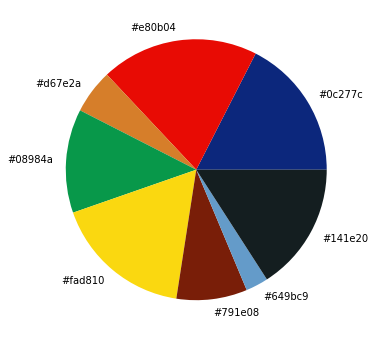

In [21]:
get_colors(get_image('Balls.png'), 8, True)

Accessing test images 

Making a dictionary of colors and R, G, B values

In [72]:
Folder = '/content/Sample_images'
images = []
for file in os.listdir(Folder):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(Folder, file)))

colors = {
    'Green':[0, 200, 0],
    'Blue':[0, 0, 200],
    'Red':[200, 0, 0],
    'Yellow':[255, 255, 0],
    'Cyan':[0, 255, 255],
    'Magenta':[128, 0, 128] 
}

Test images

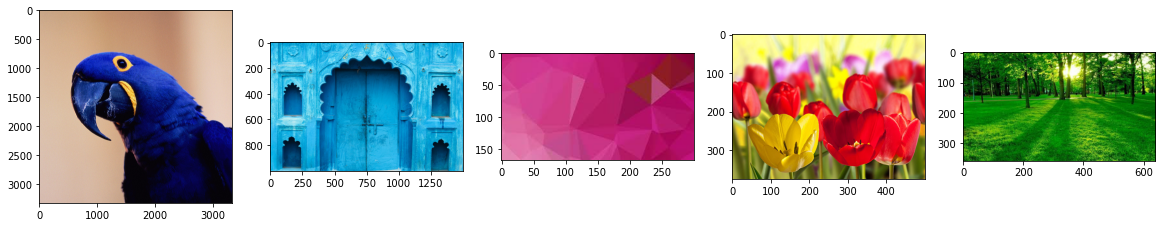

In [73]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

Detecting colour from test images

In [74]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [75]:
def show_selected_images(images, c_name, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i], color, threshold, colors_to_match)

        if (selected):
            plt.subplot(1, 5, index)
            plt.title(c_name + ' color detected in this image:')
            plt.imshow(images[i])
            index += 1

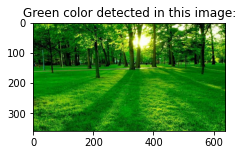

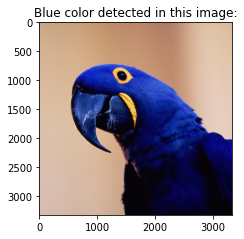

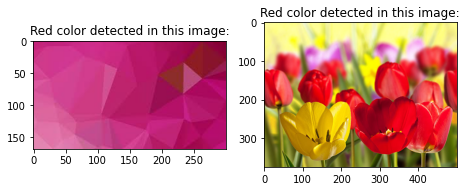

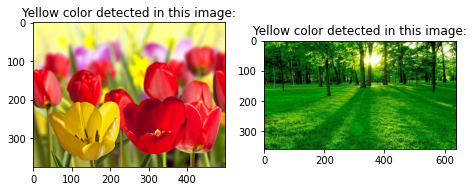

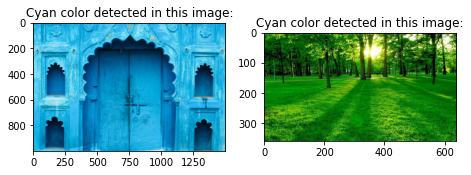

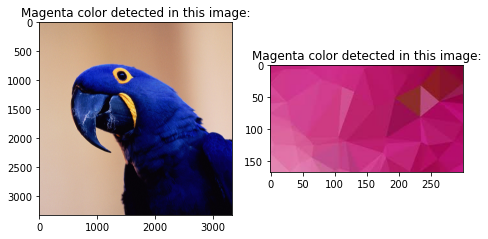

In [76]:
# Detect colors
for color in colors:
  plt.figure(figsize = (20, 20))
  show_selected_images(images, color, colors[color], 60, 5)  